# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Outlier identification and removal.

<br></font>
</div>

# Avaiilable methods

<div class="alert alert-block alert-info">
<font color=black><br>

- [1] Standard deviation method
- [2] Interquartile range method
- [3] Automatic Outlier Detection -> LocalOutlierDetection & DBScan
- [4] Boxplots
- [5] DBScan clustering
- [6] Isolation Forest
- [7] Robust Random Cut Forest

<br></font>
</div>

# Import modules

In [21]:
import numpy as np
import seaborn as sns
from numpy import std
from numpy import mean
from numpy import percentile
from pandas import read_csv
from numpy.random import seed
from numpy.random import randn
from sklearn.cluster import DBSCAN
from IPython.display import Markdown, display
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# Synthetic data generation

In [7]:
# seed the random number generator so to get consistent result
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


# Standard deviation method

<div class="alert alert-block alert-info">
<font color=black><br>

- The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

- 1 * sigma from the Mean: account for 68% of sampled data
- 2 * sigma from the Mean: account for 95% of sampled data
- 3  * sigma from the Mean: account for 99.7% of sampled data

- Three sigma from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution.

<br></font>
</div>

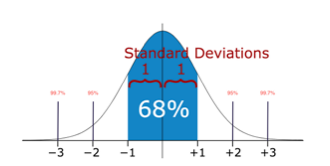

In [8]:
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


**Another code**

In [16]:
# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = std(random_data)
    random_data_mean = mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

-39.61450321504696


[-41.30494772511221,
 -49.35658065511754,
 80.77790126117762,
 -43.38734141658075,
 79.82796433212917,
 -47.27400148804358,
 87.75949264627721,
 -44.577018740944624,
 79.88576328191265,
 -39.81445955020072,
 -47.5814503805003,
 -45.097057272167405,
 -42.162992426237736,
 86.37232866234721,
 93.49620695309294,
 90.47940208284652,
 -42.44939962675426,
 -43.681072661374635,
 -39.79393514109955,
 88.54432055627417,
 83.61372781752891,
 93.5911895665595,
 -40.07422673755443,
 -44.327387606827315,
 82.77707422734392,
 -44.156340280387965,
 82.71533725439022,
 95.73931738615298,
 -58.73005896216219,
 80.43949259409719,
 94.04386687228903,
 -40.29322560537632,
 85.17540220074247,
 82.18262556044832,
 -51.232543524175654,
 -48.857415192818394,
 86.47367534831128,
 -48.47845663415657,
 -66.53774560713664,
 80.97131911086635,
 82.33169928562482,
 82.69495605495861,
 80.13534108289548,
 -42.05369188558468,
 -40.45304113005137,
 82.7857177612978,
 82.65006237295758,
 -41.82909959417919,
 -44.258575

# Interquatile range method

<div class="alert alert-block alert-info">
<font color=black><br>

- A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range (IQR). 
- The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. 
- The common value for the  factor k is the value 1.5. 
- A factor k of 3 or more can be used to identify values that are extreme outliers or far outs when described in the context of box and whisker plots. 

<br></font>
</div>

In [9]:
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr)) 
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper] 
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


# Automatic Outlier Detection method: SKLEARN LocalOutlierFactor

<div class="alert alert-block alert-info">
<font color=black><br>

- In machine learning, an approach to tackling the problem of outlier detection is one-class classification. 
- A simple approach to identifying outliers is to locate those examples that are far from the other examples in the multi-dimensional feature space. 
- This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality.

<br></font>
</div>

In [11]:
# load the dataset
df = read_csv('../DATASETS/housing_1.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# summarize the shape of the dataset
print("Initial dataset shape: ", X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 
# summarize the shape of the train and test sets
print("Train dataset shape: ", X_train.shape) 
print("Test test shape: ", X_test.shape)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('Mean absolute error BEFORE removing outliers: %.3f' % mae)

Initial dataset shape:  (506, 13) (506,)
Train dataset shape:  (339, 13)
Test test shape:  (167, 13)
Mean absolute error BEFORE removing outliers: 3.417


<div class="alert alert-block alert-info">
<font color=black><br>

- Next, we can try removing outliers from the training dataset. 
- The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.

<br></font>
</div>

In [12]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('Mean absolute errot AFTER  removing outliers: %.3f' % mae)

Mean absolute errot AFTER  removing outliers: 3.356


# Automatic Outlier Detection method: SKLEARN DBScan

<div class="alert alert-block alert-info">
<font color=black><br>

- **DBScan** is a clustering algorithm that’s used cluster data into groups.
- It is also used as a density-based anomaly detection method with either single or multi-dimensional data. 
- Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. 
- **eps** is the maximum distance between two samples for them to be considered as in the same cluster.

<br></font>
</div>

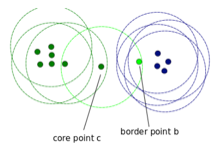

In [20]:
seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

94

# Boxplot method

<div class="alert alert-block alert-info">
<font color=black><br>

- Box plots are a graphical depiction of numerical data through their quantiles. 
- It is a very simple but effective way to visualize outliers. 
- Think about the lower and upper whiskers as the boundaries of the data distribution. 
- Any data points that show **above or below** the whiskers, can be considered outliers or anomalous

<br></font>
</div>

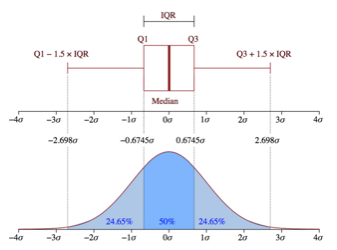

<div class="alert alert-block alert-info">
<font color=black><br>

- **Interquartile Range** (IQR) is important because it is used to define the outliers. 
- It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). 
- Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

<br></font>
</div>

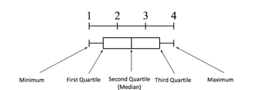

<AxesSubplot:>

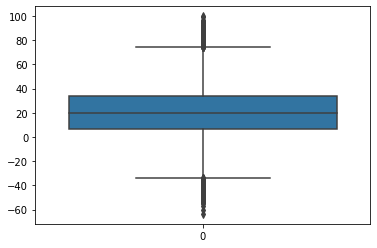

In [18]:
# Generate some random numbers
random_data = np.random.randn(50000)  * 20 + 20

sns.boxplot(data=random_data)

# Isolation Forest

<div class="alert alert-block alert-info">
<font color=black><br>

- Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family.
- It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances.
- This algorithm **works great** with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. 

<br></font>
</div>

In [ ]:
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

print("No of outliers: ", list(preds).count(-1))

# AMAZON Robust Random Cut Forest

<div class="alert alert-block alert-info">
<font color=black><br>

- Random Cut Forest (RCF) algorithm is Amazon’s unsupervised algorithm for detecting anomalies. 
- It works by associating an anomaly score as well. 
- Low score values indicate that the data point is considered “normal.” 
- High values indicate the presence of an anomaly in the data. 
- The definitions of “low” and “high” depend on the application but common practice suggests that scores beyond three standard deviations from the mean score are considered anomalous. 
- It works with **very high dimensional data.**

<br></font>
</div>

# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://stackoverflow.com/questions/34394641/dbscan-clustering-what-happens-when-border-point-of-one-cluster-is-considered
- https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
- Data preparation for machine learning, Jason Brownlee
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
- [Isolation forest paper](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)
- [AMAZON Robust Cut Forest](http://proceedings.mlr.press/v48/guha16.pdf)

<br></font>
</div>